In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv(r'C:\Users\user\Downloads\Wine_clust.csv')

In [3]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
# Checking dataset for null values

In [5]:
data.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [6]:
#checking data types in the given data set

In [7]:
data.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object

In [8]:
#No categorical values present

In [9]:
data.shape

(178, 13)

In [10]:
data.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [11]:
 # Correlation matrix to find the relation between the attibutes

<AxesSubplot:>

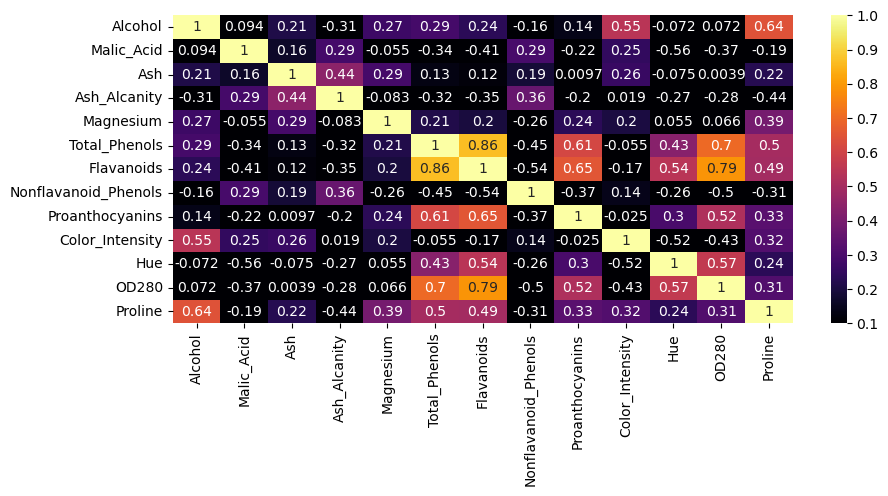

In [12]:
corr_matrix =data.corr()
plt.subplots(figsize=(10,4))
sns.heatmap(corr_matrix,vmin=0.1,vmax=1, annot=True,cmap='inferno')

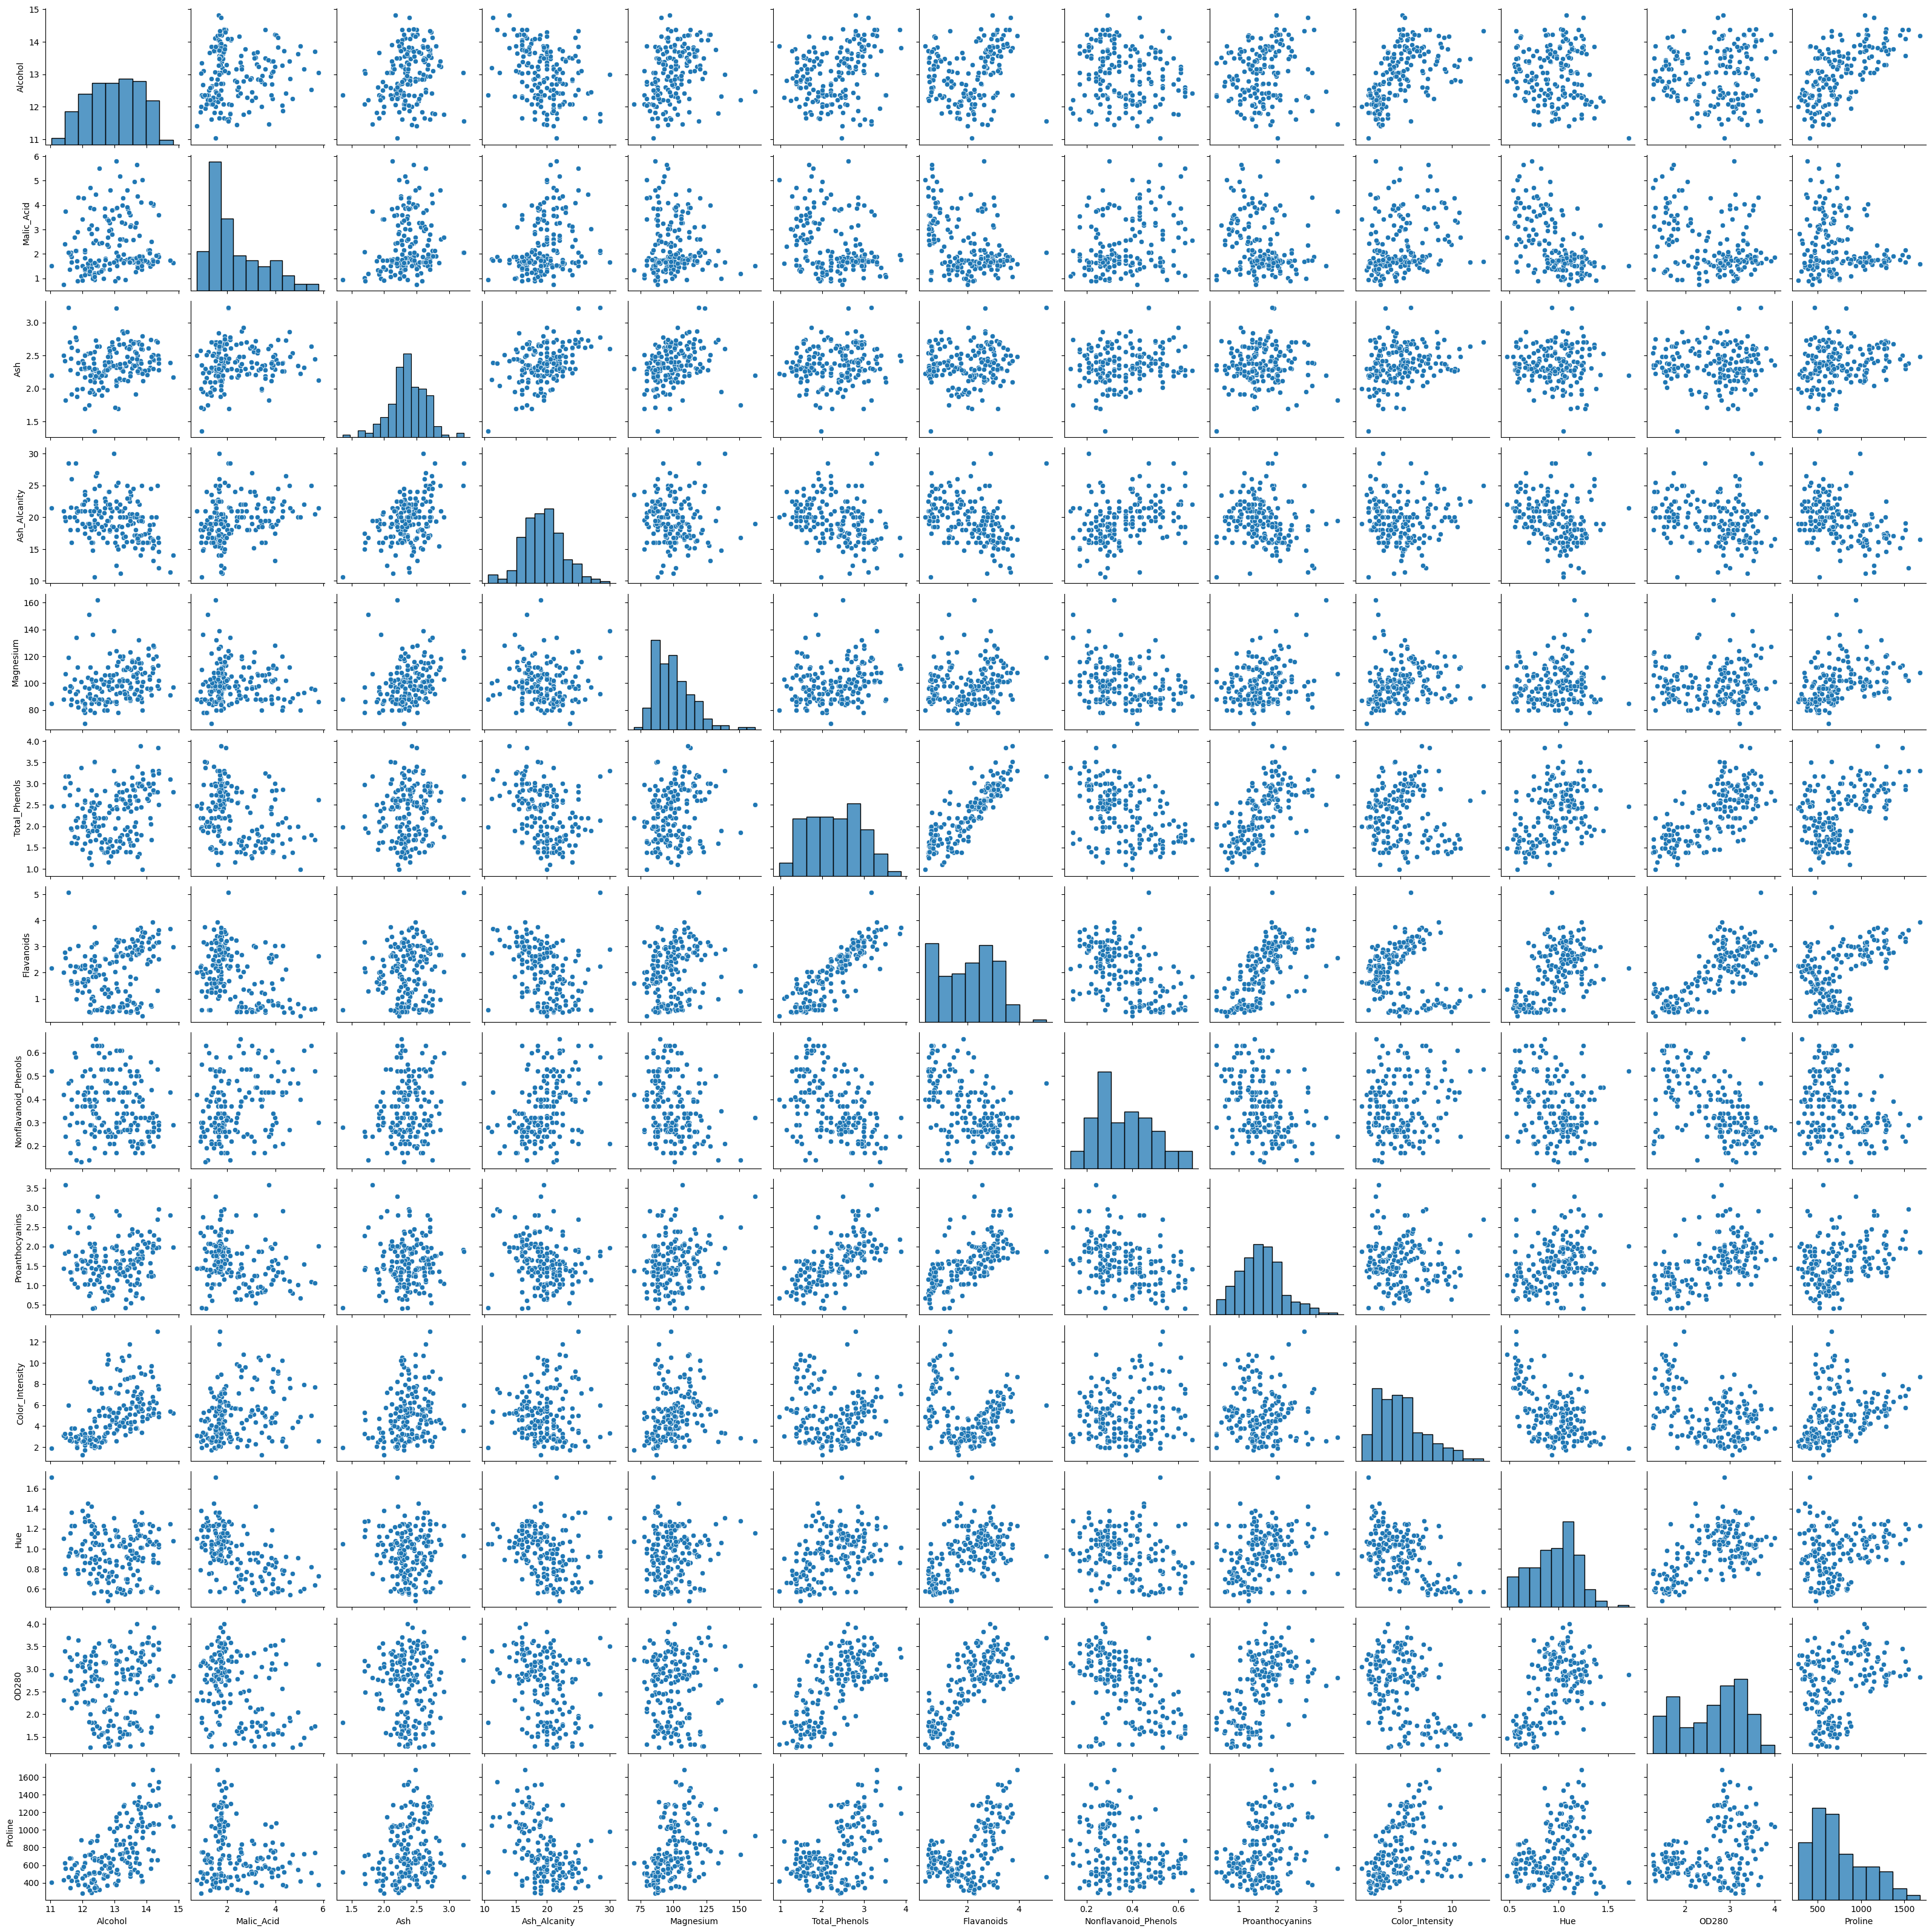

In [13]:
sns.pairplot(data)  # Pair plot to visualize the clusters
plt.show()

 # Clustering models

### Kmeans - clustering model

In [14]:
from sklearn.cluster import KMeans

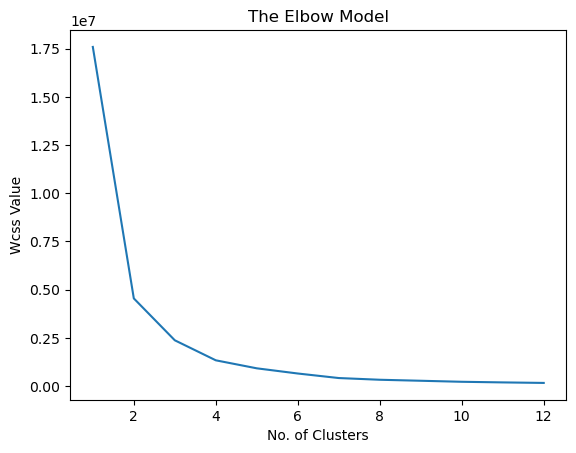

In [15]:
# Elbow method to find the  optimal number of clusters,k
wcss =[]
for i in range(1,13):
    kmeans =KMeans(n_clusters=i,init='k-means++',n_init=12,random_state=22)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,13),wcss)
plt.title("The Elbow Model")
plt.xlabel("No. of Clusters")
plt.ylabel("Wcss Value")
plt.show()

###### optimal number of clusters ,k=2

In [16]:
#Fitting the Model
kmeans= KMeans(n_clusters =2, init='k-means++',n_init=12,random_state=2)
y_means =kmeans.fit_predict(data)

In [17]:
y_means

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

### Find Silhouette Score

In [18]:
from sklearn.metrics import silhouette_score

In [19]:
sil_kmeans =silhouette_score(data,y_means)
print("Silhouette score using kmeans :",sil_kmeans)

Silhouette score using kmeans : 0.6568536504294317


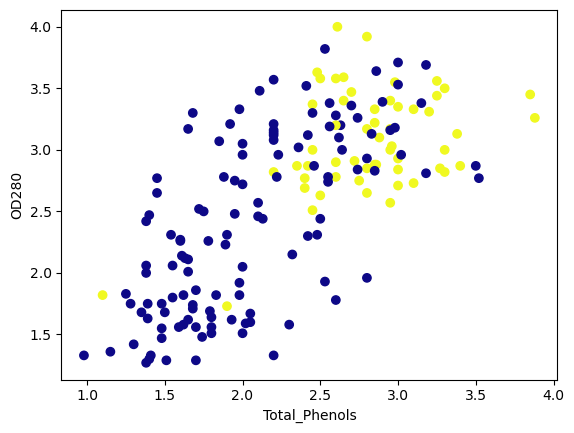

In [20]:
plt.scatter(data['Total_Phenols'], data['OD280'], c = y_means, cmap= "plasma") # plotting the clusters
plt.xlabel("Total_Phenols") # X-axis label
plt.ylabel("OD280") # Y-axis label
plt.show() # showing the plot

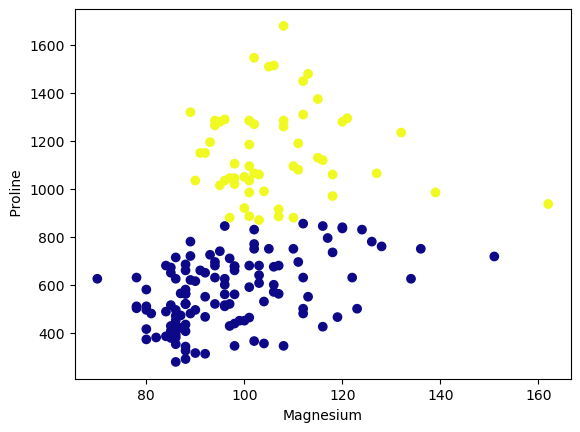

In [21]:
plt.scatter(data['Magnesium'], data['Proline'], c = y_means, cmap= "plasma") # plotting the clusters
plt.xlabel("Magnesium") # X-axis label
plt.ylabel(" Proline") # Y-axis label
plt.show() # showing the plot

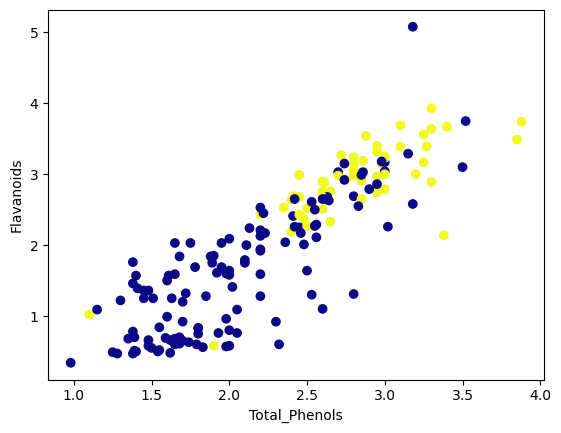

In [22]:
plt.scatter(data['Total_Phenols'], data['Flavanoids'], c = y_means, cmap= "plasma") # plotting the clusters
plt.xlabel("Total_Phenols") # X-axis label
plt.ylabel("Flavanoids") # Y-axis label
plt.show() # showing the plot

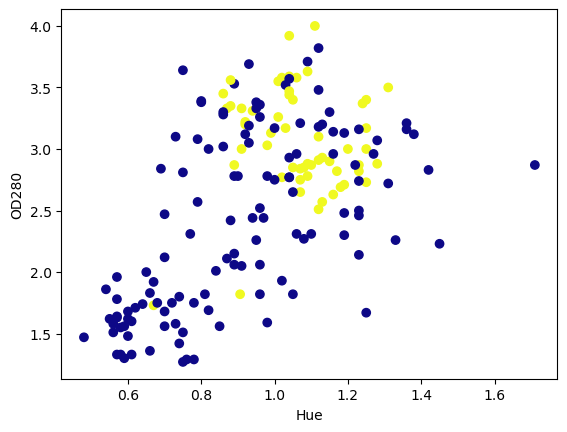

In [23]:
plt.scatter(data['Hue'], data['OD280'], c = y_means, cmap= "plasma") # plotting the clusters
plt.xlabel("Hue") # X-axis label
plt.ylabel("OD280") # Y-axis label
plt.show() # showing the plot

### Agglomerative Hierarchical clustering

In [24]:
import scipy.cluster.hierarchy as sch

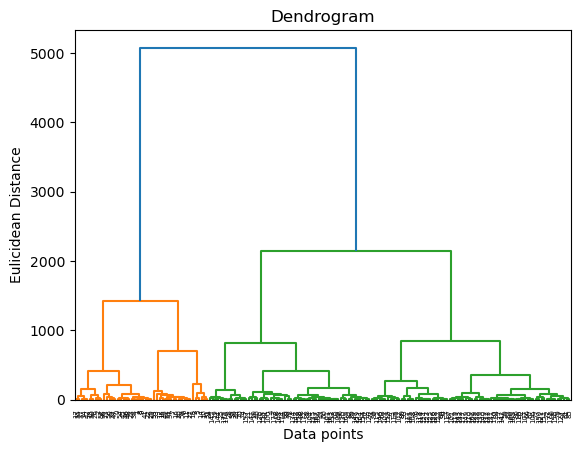

In [35]:
dendrogram =sch.dendrogram(sch.linkage(data,method='ward'))
plt.title("Dendrogram")
plt.xlabel("Data points")
plt.ylabel("Eulicidean Distance")
plt.show()

###### Number of clusters = 2 

In [37]:
#Importing Agglomerative Clustering from Sklearn.cluster

from sklearn.cluster import AgglomerativeClustering

In [38]:
#Fitting the model
hc= AgglomerativeClustering(n_clusters=2,affinity ='euclidean',linkage='ward')
y_hc =hc.fit_predict(data)

In [39]:
y_hc

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [41]:
# finding the silhouette score
sil_avg = silhouette_score(data,y_hc)
print("Silhouette score using Agglomerative Model:",sil_avg)

Silhouette score using Agglomerative Model: 0.6587292996216912


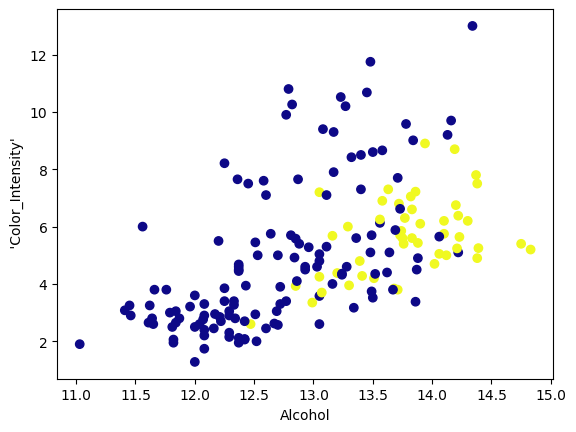

In [42]:
# Plot the clusters
plt.scatter(data['Alcohol'], data['Color_Intensity'], c = y_hc, cmap= "plasma")
plt.xlabel("Alcohol") 
plt.ylabel(" 'Color_Intensity'")
plt.show()

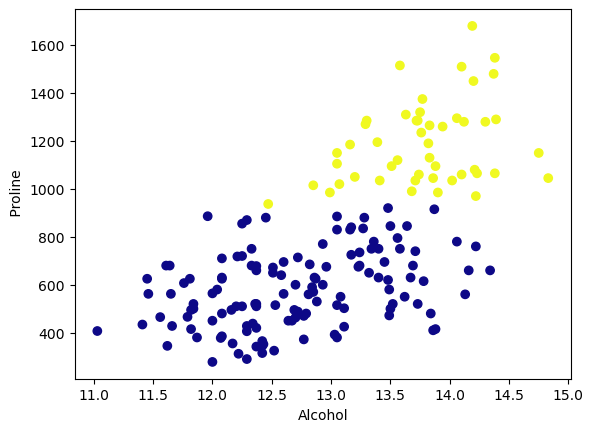

In [43]:
plt.scatter(data['Alcohol'], data['Proline'], c = y_hc, cmap= "plasma") # plotting the clusters
plt.xlabel("Alcohol") # X-axis label
plt.ylabel(" Proline") # Y-axis label
plt.show()

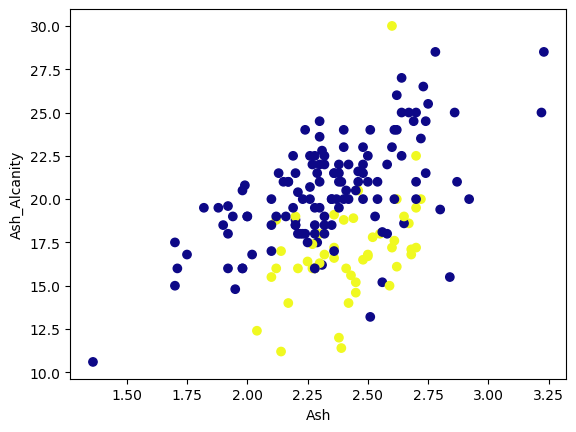

In [44]:
plt.scatter(data['Ash'], data['Ash_Alcanity'], c = y_hc, cmap= "plasma") # plotting the clusters
plt.xlabel("Ash") # X-axis label
plt.ylabel("Ash_Alcanity") # Y-axis label
plt.show()

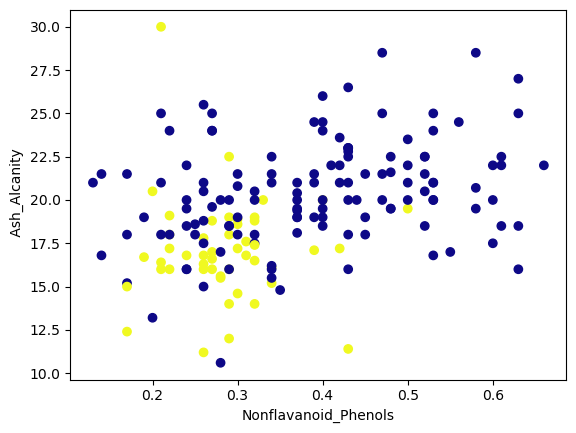

In [45]:
plt.scatter(data['Nonflavanoid_Phenols'], data['Ash_Alcanity'], c = y_hc, cmap= "plasma") # plotting the clusters
plt.xlabel("Nonflavanoid_Phenols") # X-axis label
plt.ylabel(" Ash_Alcanity") # Y-axis label
plt.show()

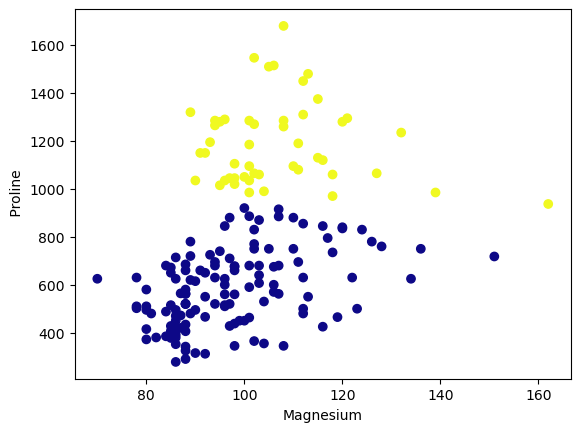

In [46]:
plt.scatter(data['Magnesium'], data['Proline'], c = y_hc, cmap= "plasma") # plotting the clusters
plt.xlabel("Magnesium") # X-axis label
plt.ylabel(" Proline") # Y-axis label
plt.show()

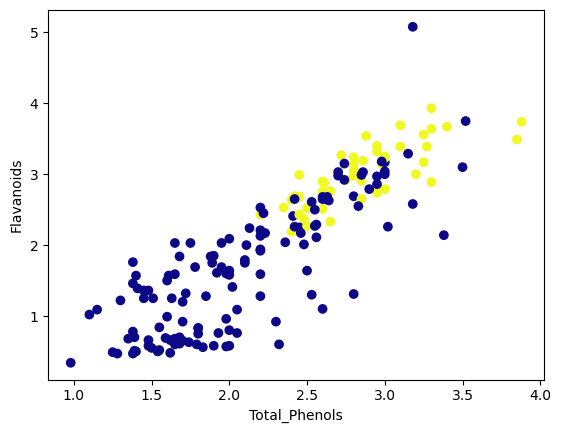

In [47]:
plt.scatter(data['Total_Phenols'], data['Flavanoids'], c = y_hc, cmap= "plasma") # plotting the clusters
plt.xlabel("Total_Phenols") # X-axis label
plt.ylabel("Flavanoids") # Y-axis label
plt.show()

### Standardization to find PCA

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
scaler =StandardScaler()  # Standard scaling for the given data
scaled_data= scaler.fit_transform(data)
scaled_data

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [52]:
scaled_data =pd.DataFrame(scaled_data,columns= data.columns)

In [53]:
scaled_data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,-8.619821e-16,-8.357859e-17,-8.657245e-16,-1.160121e-16,-1.995907e-17,-2.972030e-16,-4.016762e-16,4.079134e-16,-1.699639e-16,-1.122697e-17,3.717376e-16,2.919013e-16,-7.484650e-18
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246e+00,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-8.854682e-01,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,9.595986e-02,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,8.089974e-01,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515e+00,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


### PCA

In [54]:
#Importing PCA from sklearn.decomposition

from sklearn.decomposition import PCA

In [55]:
pca1 = PCA(n_components =10)# column name choose as 3
pca1.fit(scaled_data)
x_pca1 = pca1.transform(scaled_data)

In [57]:
x_pca1.shape

(178, 10)

In [58]:
pca1.explained_variance_ratio_

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019])

In [60]:
np.cumsum(pca1.explained_variance_ratio_)

array([0.36198848, 0.55406338, 0.66529969, 0.73598999, 0.80162293,
       0.85098116, 0.89336795, 0.92017544, 0.94239698, 0.96169717])

In [61]:
pca1.components_

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283],
       [-0.20738262,  0.08901289,  0.6262239 ,  0.61208035,  0.13075693,
         0.14617896,  0.1506819 ,  0.17036816,  0.14945431, -0.13730621,
         0.08522192,  0.16600459, -0.12674592],
       [-0.0178563 ,  0.53689028, -0.21417556,  0.06085941, -0.35179658,
         0.19806835,  0.15229479, -0.20330102,  0.39905653,  0.06592568,
        -0.42777141,  0.18412074, -0.23207086],
       [-0.26566365,  0.03521363, -0.14302547,  0.06610294,  0.72704851,
        -0.14931841, -0.10902584, -0.50070298,  0.13685982, -0.07643678,
        -0.17361452, -0.10116099, -0.1578688 ],
       [-0.21353865, -0.536813

### Kmeans Silhouette score after PCA

In [66]:
kmeans_pca1= KMeans(n_clusters =2, init='k-means++',random_state=2)
y_means_pca1 =kmeans_pca1.fit_predict(x_pca1)

In [63]:
y_means_pca1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [64]:
sil_kmeans_pca1 =silhouette_score(x_pca1,y_means_pca1)
print("Silhouette score for kmeans after findinf the PCA :",sil_kmeans_pca1)

Silhouette score for kmeans after findinf the PCA : 0.2697930559820898


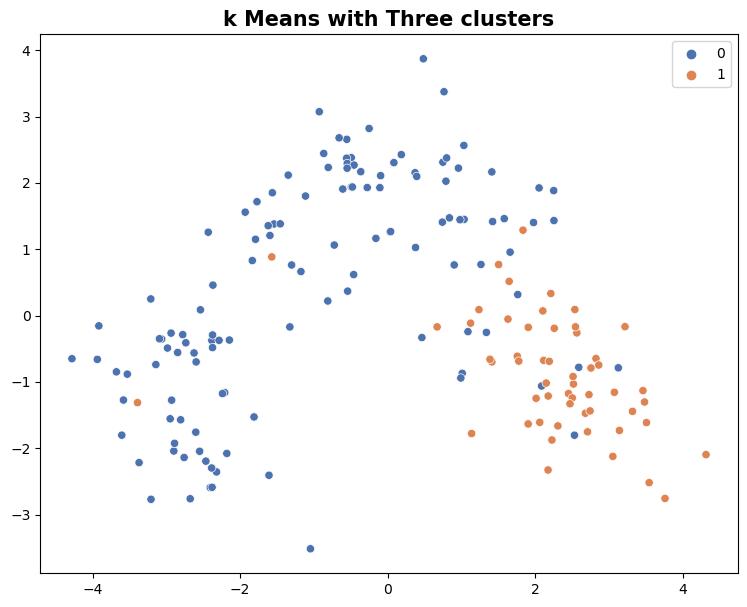

In [65]:
# Cluster after PCA
plt.figure(figsize=(9,7))
sns.scatterplot(hue=y_means, x=x_pca1[:,0], y=x_pca1[:,1],palette="deep")
plt.title("k Means with Three clusters",fontsize=15,fontweight="bold")
plt.show()

### Agglomerative Hierarchical Clutsering Silhouette score after PCA

In [67]:
hc_pca1= AgglomerativeClustering(n_clusters=2,affinity ='euclidean',linkage='ward')
y_hc_pca1 =hc.fit_predict(x_pca1)

In [68]:
y_hc_pca1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [69]:
sil_avg_pca1 = silhouette_score(x_pca1,y_hc_pca1)
print("Silhouette score for Agglomerative Clustering after PCA :",sil_avg_pca1)

Silhouette score for Agglomerative Clustering after PCA : 0.2720325942157364


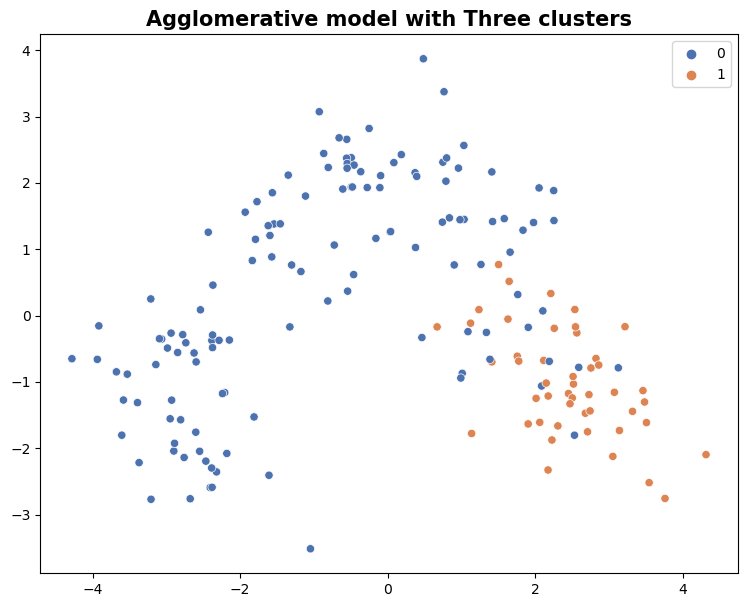

In [71]:
# Cluster after PCA
plt.figure(figsize=(9,7))
sns.scatterplot(hue=y_hc, x=x_pca1[:,0], y=x_pca1[:,1],palette="deep")
plt.title("Agglomerative model with Three clusters",fontsize=15,fontweight="bold")
plt.show()

### Density-based clustering: DBSCAN

#### Normalize the data

In [72]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import normalize

In [73]:
normalized_data = normalize(data)

In [74]:
type(normalized_data)

numpy.ndarray

In [75]:
normalized_data = pd.DataFrame(normalized_data)

In [76]:
type(normalized_data)

pandas.core.frame.DataFrame

In [77]:
normalized_data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.019950,0.003711,0.003644,0.031124,0.151541,0.003444,0.002973,0.000581,0.002396,0.007342,0.001477,0.003993,0.986018
std,0.007321,0.002499,0.001409,0.014671,0.054081,0.001543,0.001802,0.000327,0.001249,0.003843,0.000736,0.001979,0.010073
min,0.008428,0.000944,0.001473,0.007739,0.064147,0.001255,0.000637,0.000145,0.000554,0.002241,0.000579,0.001675,0.951812
25%,0.013548,0.001684,0.002359,0.017615,0.109775,0.002385,0.001746,0.000277,0.001515,0.004612,0.000970,0.002535,0.981687
50%,0.018984,0.003174,0.003468,0.030036,0.146777,0.002946,0.002721,0.000514,0.002030,0.005981,0.001232,0.003384,0.988441
75%,0.024783,0.004981,0.004506,0.040010,0.183082,0.003886,0.003551,0.000833,0.003040,0.008853,0.001834,0.004870,0.993564
max,0.041106,0.014852,0.007305,0.069703,0.297958,0.008404,0.010560,0.002008,0.007469,0.021876,0.004727,0.010858,0.997835


In [78]:
normalized_data.columns=data.columns

In [79]:
normalized_data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,0.013264,0.001594,0.002265,0.014542,0.118383,0.002610,0.002852,0.000261,0.002135,0.005257,0.000969,0.003654,0.992738
1,0.012513,0.001687,0.002029,0.010617,0.094794,0.002512,0.002616,0.000246,0.001213,0.004152,0.000995,0.003223,0.995336
2,0.011063,0.001984,0.002245,0.015636,0.084906,0.002354,0.002724,0.000252,0.002362,0.004775,0.000866,0.002665,0.996176
3,0.009680,0.001314,0.001684,0.011317,0.076119,0.002593,0.002351,0.000162,0.001468,0.005254,0.000579,0.002324,0.996961
4,0.017775,0.003477,0.003853,0.028193,0.158418,0.003759,0.003611,0.000524,0.002443,0.005800,0.001396,0.003934,0.986753


In [80]:
normalized_data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.019950,0.003711,0.003644,0.031124,0.151541,0.003444,0.002973,0.000581,0.002396,0.007342,0.001477,0.003993,0.986018
std,0.007321,0.002499,0.001409,0.014671,0.054081,0.001543,0.001802,0.000327,0.001249,0.003843,0.000736,0.001979,0.010073
min,0.008428,0.000944,0.001473,0.007739,0.064147,0.001255,0.000637,0.000145,0.000554,0.002241,0.000579,0.001675,0.951812
25%,0.013548,0.001684,0.002359,0.017615,0.109775,0.002385,0.001746,0.000277,0.001515,0.004612,0.000970,0.002535,0.981687
50%,0.018984,0.003174,0.003468,0.030036,0.146777,0.002946,0.002721,0.000514,0.002030,0.005981,0.001232,0.003384,0.988441
75%,0.024783,0.004981,0.004506,0.040010,0.183082,0.003886,0.003551,0.000833,0.003040,0.008853,0.001834,0.004870,0.993564
max,0.041106,0.014852,0.007305,0.069703,0.297958,0.008404,0.010560,0.002008,0.007469,0.021876,0.004727,0.010858,0.997835


### DBSCAN

In [81]:
from sklearn.neighbors import NearestNeighbors # importing the library
neighb = NearestNeighbors(n_neighbors=5) # creating an object of the NearestNeighbors class
nbrs=neighb.fit(data) # fitting the data to the object
distances,indices=nbrs.kneighbors(data)

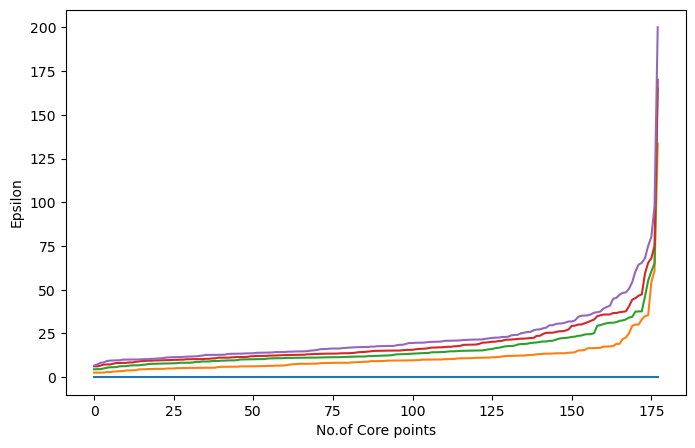

In [82]:
# Sort and plot the distances results
distances = np.sort(distances, axis = 0) # sorting the distances
distances = distances[:,:] # taking the second column of the sorted distances
plt.figure(figsize= (8,5))  # setting the figure size to (5,3)
plt.xlabel("No.of Core points")
plt.ylabel("Epsilon")
plt.plot(distances) # plotting the distances
plt.show() # showing the plot to find epslion

In [83]:
# cluster the data into five clusters
dbscan = DBSCAN(eps = 40, min_samples = 4).fit(data) # fitting the model
labels = dbscan.labels_ # getting the labels
clusters = dbscan.labels_
no_clusters=len(set(clusters))# no of clusters in dbscan

In [84]:
print("No of clusters :",no_clusters)

No of clusters : 5


In [85]:
labels

array([ 0,  0,  0,  1,  2,  1,  3,  3,  0,  0,  1,  3,  3,  0,  1,  3,  3,
        0, -1,  2,  2,  2,  0,  0,  2,  2,  0,  3,  2,  0,  3,  1,  0,  3,
        0,  2,  2,  0,  0,  2,  2,  0,  0,  2,  2,  0,  0,  0,  0,  3,  0,
        3,  0, -1,  0,  0,  0,  3,  3,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  0,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2, -1,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2], dtype=int64)

In [86]:
# Silhouette score of dbscan
sil_dbscan = silhouette_score(data,clusters)
print("Silhouette score of DBscan:",sil_dbscan)

Silhouette score of DBscan: 0.5609783563170826


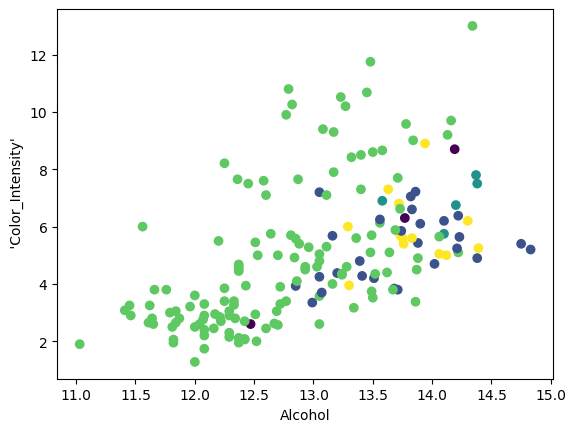

In [93]:
#plotting clusters in DbScan taking only two attributes
plt.scatter(data['Alcohol'], data['Color_Intensity'], c = labels, cmap= "viridis")
plt.xlabel("Alcohol") 
plt.ylabel(" 'Color_Intensity'")
plt.show() 

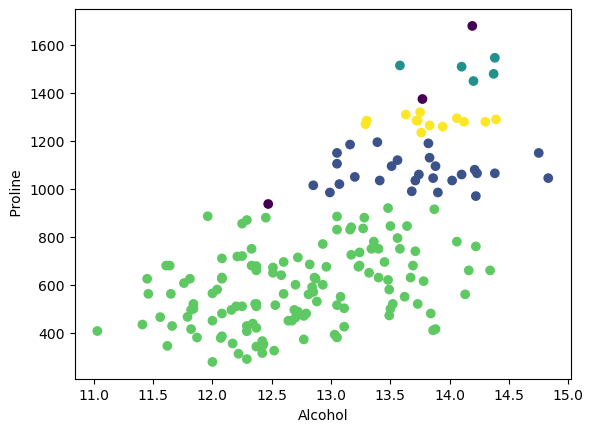

In [94]:
plt.scatter(data['Alcohol'], data['Proline'], c = labels, cmap= "viridis") # plotting the clusters
plt.xlabel("Alcohol") 
plt.ylabel(" Proline") 
plt.show() 

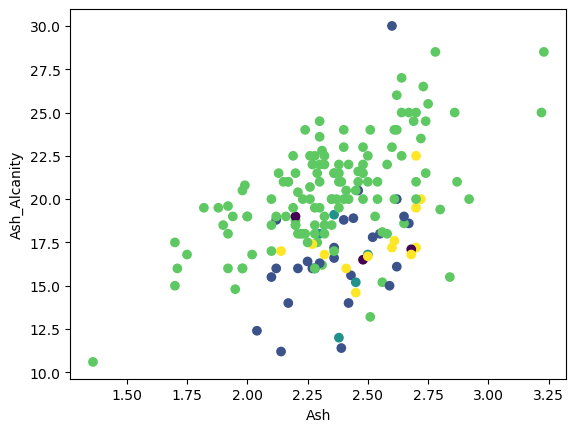

In [96]:
plt.scatter(data['Ash'], data['Ash_Alcanity'], c = labels, cmap= "viridis") # plotting the clusters
plt.xlabel("Ash") 
plt.ylabel("Ash_Alcanity") 
plt.show()

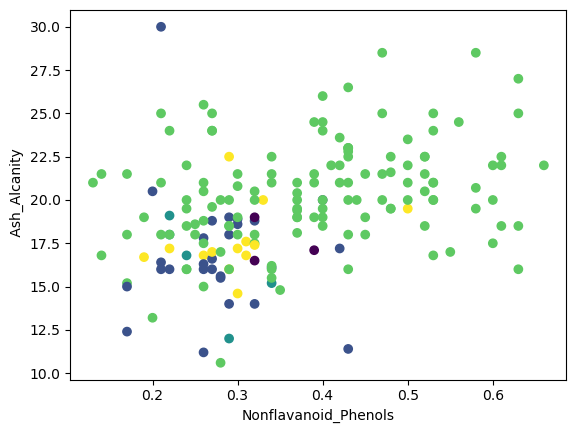

In [98]:
plt.scatter(data['Nonflavanoid_Phenols'], data['Ash_Alcanity'], c = labels, cmap= "viridis") # plotting the clusters
plt.xlabel("Nonflavanoid_Phenols")
plt.ylabel(" Ash_Alcanity") 
plt.show()

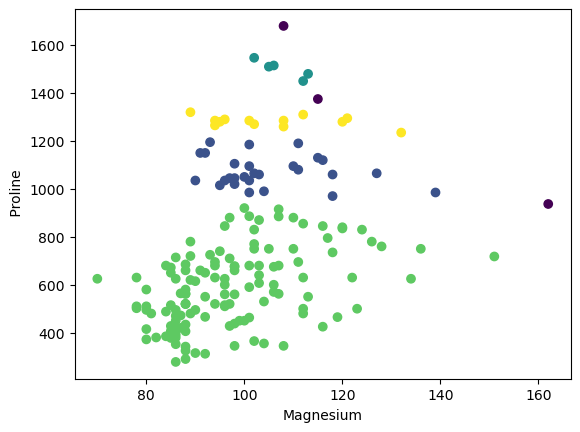

In [100]:
plt.scatter(data['Magnesium'], data['Proline'], c = labels, cmap= "viridis") # plotting the clusters
plt.xlabel("Magnesium")
plt.ylabel(" Proline") 
plt.show()

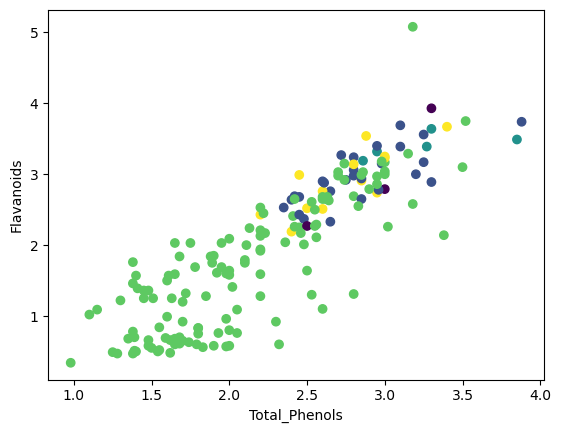

In [101]:
plt.scatter(data['Total_Phenols'], data['Flavanoids'], c = labels, cmap= "viridis") # plotting the clusters
plt.xlabel("Total_Phenols") # X-axis label
plt.ylabel("Flavanoids") # Y-axis label
plt.show()

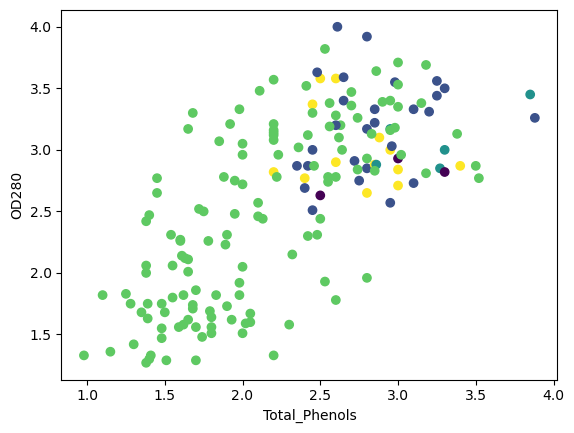

In [102]:
plt.scatter(data['Total_Phenols'], data['OD280'], c = labels, cmap= "viridis") # plotting the clusters
plt.xlabel("Total_Phenols") # X-axis label
plt.ylabel("OD280") # Y-axis label
plt.show()

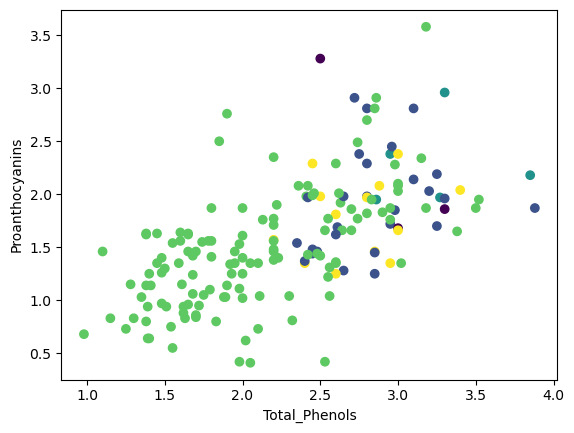

In [104]:
plt.scatter(data['Total_Phenols'], data['Proanthocyanins'], c = labels, cmap= "viridis") # plotting the clusters
plt.xlabel("Total_Phenols") 
plt.ylabel("Proanthocyanins") 
plt.show()

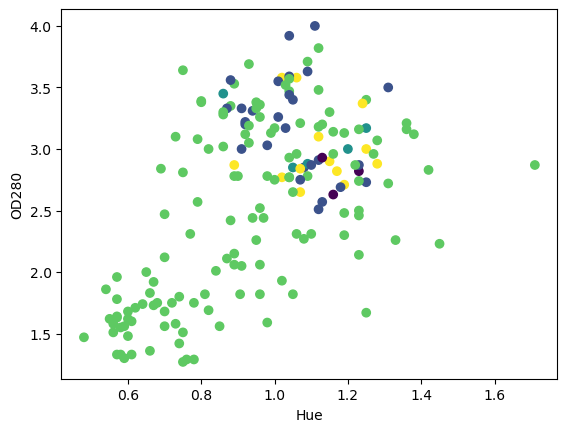

In [106]:
plt.scatter(data['Hue'], data['OD280'], c = labels, cmap= "viridis") # plotting the clusters
plt.xlabel("Hue") 
plt.ylabel("OD280") 
plt.show()

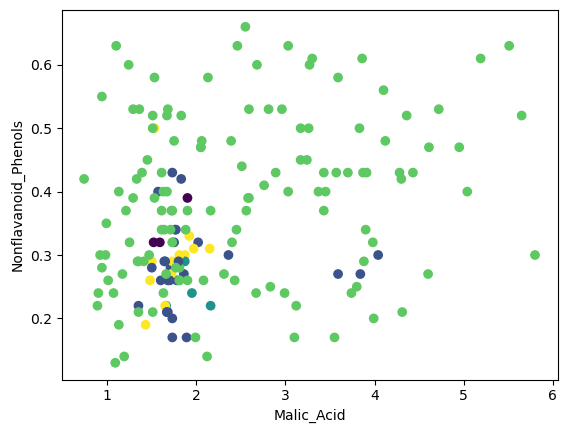

In [107]:
plt.scatter(data['Malic_Acid'], data['Nonflavanoid_Phenols'], c = labels, cmap= "viridis") 
plt.xlabel("Malic_Acid") 
plt.ylabel("Nonflavanoid_Phenols") 
plt.show()

### PCA for DBSCAN

In [108]:
pca = PCA(n_components=10)
xdb_pca = pca.fit_transform(normalized_data)

In [111]:
dbscan_pca = DBSCAN(eps = 40, min_samples = 4).fit(normalized_data) # fitting the model
labels_pca = dbscan_pca.labels_ # getting the labels
clusters_pca = dbscan.labels_
no_clusters_pca=len(set(clusters))
print("No of clusters after normalizing the data:",no_clusters_pca)

No of clusters after normalizing the data: 5


In [112]:
sil_dbscan = silhouette_score(xdb_pca,clusters_pca)
print("Silhouette score of DBscan after finding PCA:",sil_dbscan)

Silhouette score of DBscan after finding PCA: 0.15251329651678852


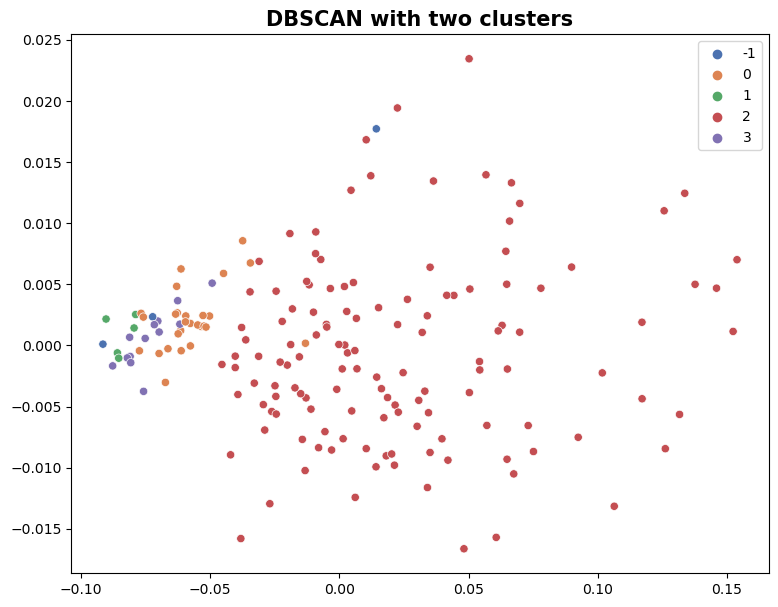

In [113]:
plt.figure(figsize=(9,7))
sns.scatterplot(hue=dbscan.labels_, x=xdb_pca[:,0], y=xdb_pca[:,1],palette="deep")
plt.title("DBSCAN with two clusters",fontsize=15,fontweight="bold")
plt.show()

### Silhouette value is reducing after calculating PCA.
#### >Silhouette score using kmeans : 0.6568536504294317
#### >Silhouette score using Agglomerative Model: 0.6587292996216912
#### >Silhouette score of DBscan: 0.5609783563170826
### The best score near to 1 is using Agglomerative model